# EDA on Cosmetics Data Set

Description of features in the data set

● ParentSKU: Parent Stock Keeping Unit. ● Site ID: Location of Warehouse. ● Year: Year on which sales had happened. ● Month: Monthon which sales had happened. ● CategoryNameID: Product Category Name ID. ● Unit: Unit of the product package. ● Qty: Number of products sold. ● Net Sales Calculated: Total amount that should be billed. ● Cash Discount: Per product discount on purchase of bulk. ● Amount to customer: Amount that the customer has been billed. ● MRP: Maximum Retail Price of the product. ● Pack Size: Quantity of per product that has been bought. ● Pack Unit: Unit of the product. ● State: State at which the sales had happened. ● Zone: Zone ID where the sales had happened. ● Master Category: Master Category of the product. Super set of Category Name ID. ● Size: Pack size of the product. ● Rank: Priority of the product to the client. Rank 1 is more important and so on.. ● Date: Transaction date.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Let me import the data set
df = pd.read_csv('Hackathon.csv')
df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,01-04-2017
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,01-05-2017
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,01-06-2017
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,01-07-2017
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,01-08-2017


In [3]:
df.shape

(34950, 20)

In [4]:
df.dtypes

ParentSKU                object
Site Id                  object
Year                      int64
Month                     int64
Category Name ID          int64
Unit                     object
Qty                     float64
Price                     int64
Net Sales calculated      int64
Cash Discount             int64
Amount to Customer        int64
MRP                     float64
Pack Size               float64
Pack Unit Id             object
State                    object
Zone                     object
Master Category           int64
Size                     object
Rank                      int64
Date                     object
dtype: object

In [5]:
df.isnull().sum()

ParentSKU               0
Site Id                 0
Year                    0
Month                   0
Category Name ID        0
Unit                    0
Qty                     0
Price                   0
Net Sales calculated    0
Cash Discount           0
Amount to Customer      0
MRP                     0
Pack Size               0
Pack Unit Id            0
State                   0
Zone                    0
Master Category         0
Size                    0
Rank                    0
Date                    0
dtype: int64

# Outlier Detection and Treatment

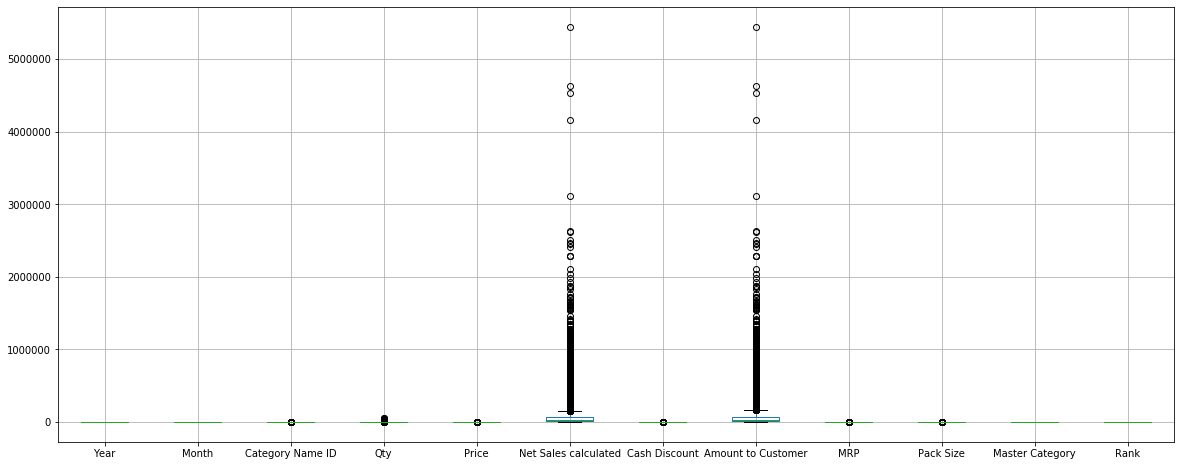

In [6]:
df.boxplot(figsize=(20,8))

We have outliers in Qty, Net sales, Amount to customer, Price, MRP, Pack size columns

In [7]:
print(df['Qty'].quantile(0.10))
print(df['Qty'].quantile(0.90))

44.0
1287.0


In [8]:
df["Qty"] = np.where(df["Qty"] <44.0, 44.0,df['Qty'])
df["Qty"] = np.where(df["Qty"] >1287.0, 1287.0,df['Qty'])

In [9]:
print(df['Net Sales calculated'].quantile(0.10))
print(df['Net Sales calculated'].quantile(0.90))

6702.800000000001
148929.6000000001


In [10]:
df["Net Sales calculated"] = np.where(df["Net Sales calculated"] <6702.8, 6702.8,df['Net Sales calculated'])
df["Net Sales calculated"] = np.where(df["Net Sales calculated"] >148929.6, 148929.6,df['Net Sales calculated'])

In [11]:
print(df['Amount to Customer'].quantile(0.10))
print(df['Amount to Customer'].quantile(0.90))

6735.0
150884.6


In [12]:
df["Amount to Customer"] = np.where(df["Amount to Customer"] <6702.8, 6702.8,df['Amount to Customer'])
df["Amount to Customer"] = np.where(df["Amount to Customer"] >148929.6, 148929.6,df['Amount to Customer'])

In [13]:
print(df['Price'].quantile(0.10))
print(df['Price'].quantile(0.90))

59.0
305.0


In [14]:
df["Price"] = np.where(df["Price"] <6702.8, 6702.8,df['Price'])
df["Price"] = np.where(df["Price"] >148929.6, 148929.6,df['Price'])

In [15]:
print(df['MRP'].quantile(0.10))
print(df['MRP'].quantile(0.90))

95.0
475.0


In [16]:
df["MRP"] = np.where(df["MRP"] <6702.8, 6702.8,df['MRP'])
df["MRP"] = np.where(df["MRP"] >148929.6, 148929.6,df['MRP'])

In [17]:
print(df['Pack Size'].quantile(0.10))
print(df['Pack Size'].quantile(0.90))

1.0
150.0


In [18]:
df["Pack Size"] = np.where(df["Pack Size"] <1.0, 1.0,df['Pack Size'])
df["Pack Size"] = np.where(df["Pack Size"] >150.0, 150.0,df['Pack Size'])

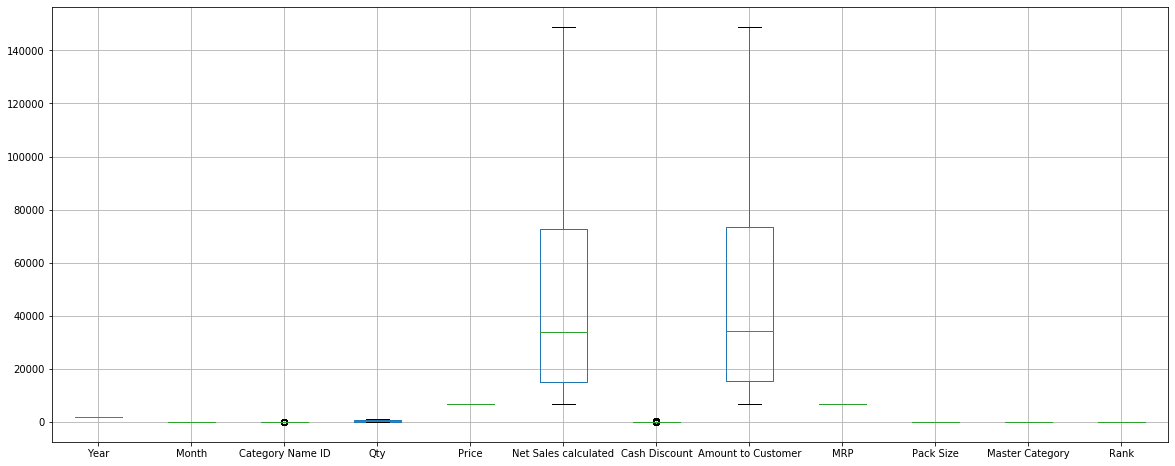

In [19]:
#Outliers removed
df.boxplot(figsize=(20,8))

# Treating of Categorical Data

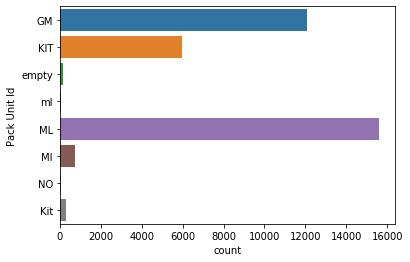

In [20]:
sns.countplot(y='Pack Unit Id', data=df)

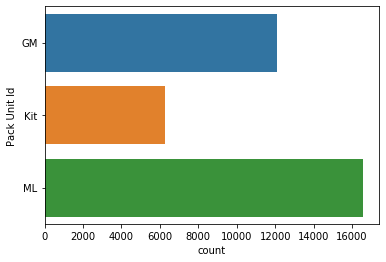

In [21]:
df['Pack Unit Id'].replace('empty','ML',inplace=True)
df['Pack Unit Id'].replace('NO','ML',inplace=True)
df['Pack Unit Id'].replace('ml','ML',inplace=True)
df['Pack Unit Id'].replace('Ml','ML',inplace=True)
df['Pack Unit Id'].replace('KIT','Kit',inplace=True)
df['Pack Unit Id'].replace('Kit','Kit',inplace=True)
sns.countplot(y='Pack Unit Id', data=df)

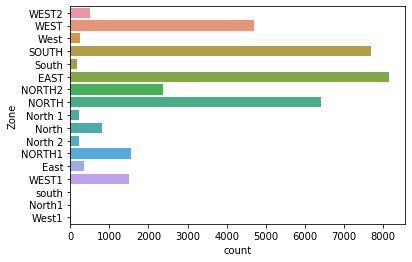

In [22]:
sns.countplot(y='Zone', data=df)

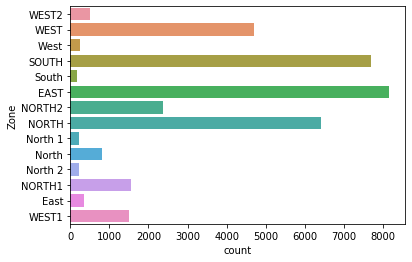

In [23]:
df.drop(df[df['Zone'] == 'south'].index, inplace = True) 
df.drop(df[df['Zone'] == 'North1'].index, inplace = True) 
df.drop(df[df['Zone'] == 'West1'].index, inplace = True) 
sns.countplot(y='Zone', data=df)

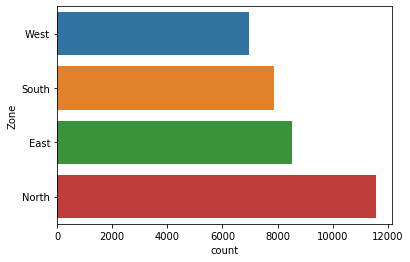

In [43]:
df['Zone'].replace('WEST2','West',inplace=True)
df['Zone'].replace('WEST1','West',inplace=True)
df['Zone'].replace('WEST','West',inplace=True)
df['Zone'].replace('NORTH2','North',inplace=True)
df['Zone'].replace('North 1','North',inplace=True)
df['Zone'].replace('NORTH','North',inplace=True)
df['Zone'].replace('North','North',inplace=True)
df['Zone'].replace('North 2','North',inplace=True)
df['Zone'].replace('NORTH1','North',inplace=True)
df['Zone'].replace('SOUTH','South',inplace=True)
df['Zone'].replace('EAST','East',inplace=True)

sns.countplot(y='Zone', data=df)

In [25]:
df['Site Id'].replace('North','North',inplace=True)
df['Site Id'].replace('North 2','North',inplace=True)

Am dropping some of the columns: Date: Because the dataset already consists of date, month and year column Unit: Since it has only "No" values in it State: We have only one state i.e.. 'DL'

In [26]:
df.drop(['Date', 'Unit', 'State'], axis=1, inplace = True)

Am renaming some of the column labels, since they are lengthy

In [27]:
df = df.rename(columns={"Site Id":"Site_id","Category Name ID":"Category_id","Net Sales calculated":"Net_sales","Cash Discount":"Discount","Amount to Customer":"ATC","Pack Size":"Pack_size","Pack Unit Id":"Pack_unit_id","Age (day)":"Age","Master Category":"Master_category"})
df.head()


,ParentSKU,Site_id,Year,Month,Category_id,Qty,Price,Net_sales,Discount,ATC,MRP,Pack_size,Pack_unit_id,Zone,Master_category,Size,Rank
0,F0033,AHMEDABAD,2017,4,0,1287.0,6702.8,82557.0,20,93640.0,6702.8,30.0,GM,West,3,30gm,4
1,F0033,AHMEDABAD,2017,5,0,651.0,6702.8,31473.0,21,35760.0,6702.8,30.0,GM,West,3,30gm,4
2,F0033,AHMEDABAD,2017,6,0,457.0,6702.8,19580.0,12,22293.0,6702.8,30.0,GM,West,3,30gm,4
3,F0033,AHMEDABAD,2017,7,0,1287.0,6702.8,78144.0,0,78144.0,6702.8,30.0,GM,West,3,30gm,4
4,F0033,AHMEDABAD,2017,8,0,44.0,6702.8,6702.8,0,6702.8,6702.8,30.0,GM,West,3,30gm,4


In [28]:
df.to_csv("Cleaned_data.csv", index = False)

In [29]:
new_df = pd.read_csv("Cleaned_data.csv")
new_df.head()

,ParentSKU,Site_id,Year,Month,Category_id,Qty,Price,Net_sales,Discount,ATC,MRP,Pack_size,Pack_unit_id,Zone,Master_category,Size,Rank
0,F0033,AHMEDABAD,2017,4,0,1287.0,6702.8,82557.0,20,93640.0,6702.8,30.0,GM,West,3,30gm,4
1,F0033,AHMEDABAD,2017,5,0,651.0,6702.8,31473.0,21,35760.0,6702.8,30.0,GM,West,3,30gm,4
2,F0033,AHMEDABAD,2017,6,0,457.0,6702.8,19580.0,12,22293.0,6702.8,30.0,GM,West,3,30gm,4
3,F0033,AHMEDABAD,2017,7,0,1287.0,6702.8,78144.0,0,78144.0,6702.8,30.0,GM,West,3,30gm,4
4,F0033,AHMEDABAD,2017,8,0,44.0,6702.8,6702.8,0,6702.8,6702.8,30.0,GM,West,3,30gm,4


# Exploratory Data Anlaysis

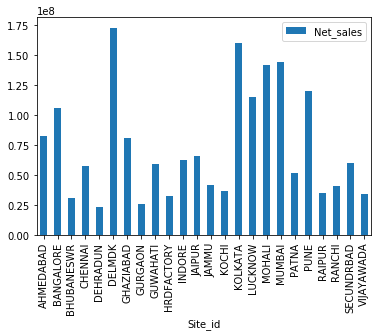

In [30]:
sales = new_df[["Site_id", "Net_sales"]]
sales.groupby("Site_id").sum().plot(kind="bar")

Sales are high in DELMDK, Kolkata where as Dehradun, bhubneshwar, Gurgaun has least

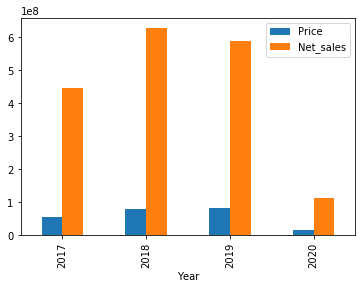

In [42]:
yearly_sales = new_df[["Year", "Price", 'Net_sales']]
yearly_sales.groupby("Year").sum().plot(kind="bar")

In [ ]:
Yearly sales is high in the year 2018, 2019 and least in the year 2020

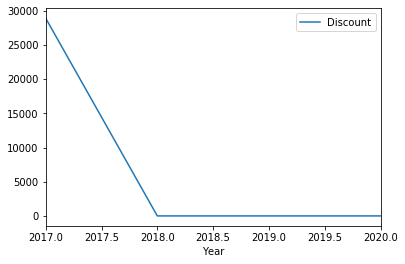

In [41]:
yearly_sales = new_df[["Year", "Discount"]]
yearly_sales.groupby("Year").sum().plot(kind="line")

I wanted to know the reason for decrease in sales in 2020, found that Discount provided may be possible impact.

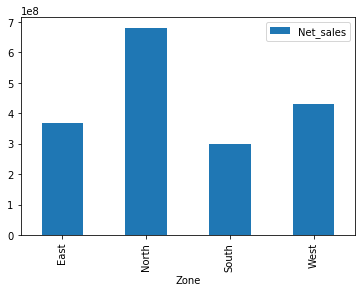

In [44]:
zone_sales = df[["Net_sales", 'Zone']]
zone_sales.groupby("Zone").sum().plot(kind="bar")

In [ ]:
Zone wise sales, it is clear that north zone has max sales

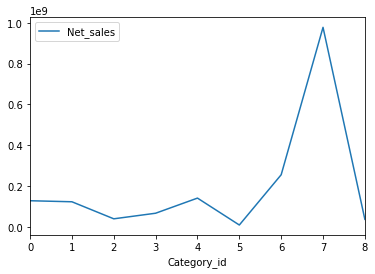

In [35]:
c_netsales = new_df[[ "Category_id", "Net_sales"]]
c_netsales.groupby("Category_id").sum().plot(kind="line")

Category 7 has the maximum sales and 2 has min

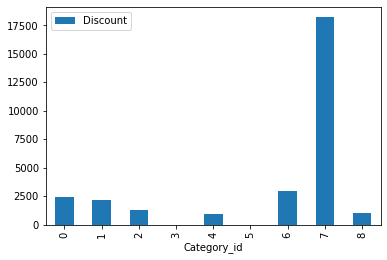

In [36]:
df_c_discount = df[[ "Category_id", "Discount"]]
df_c_discount.groupby("Category_id").sum().plot(kind="bar")

Again the reason for maximum sales of category 7 is because of high discount provided

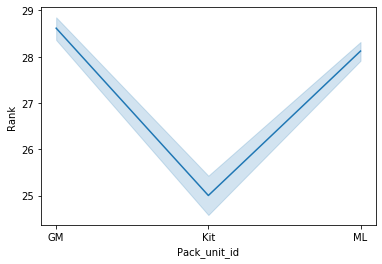

In [37]:
sns.lineplot(x="Pack_unit_id", y="Rank", data=df)

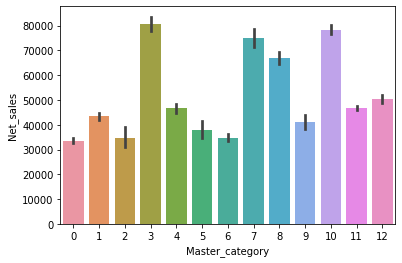

In [38]:
sns.barplot(x="Master_category", y="Net_sales", data=df)

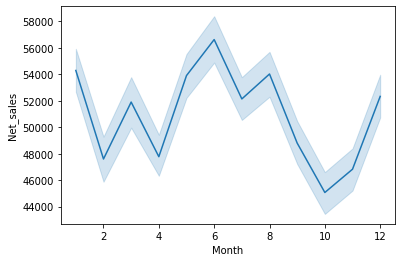

In [39]:
sns.lineplot(x="Month", y="Net_sales", data=df)

Monthly sales is high in the month of june(6) and minimum in the month of october

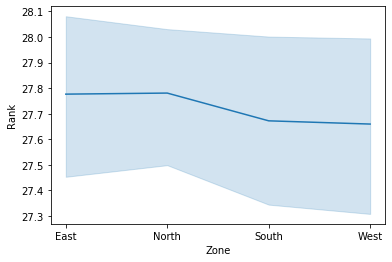

In [45]:
sns.lineplot(x="Zone", y='Rank', data=df)

The North zone has more rank compared to other